In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json

import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd

#import cv2_
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import shutil
import keras
from PIL import Image
#import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import re
import string

from keras.models import load_model
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Lambda, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Input
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
AUTO = tf.data.AUTOTUNE
from sklearn.metrics import confusion_matrix
import random
import tensorflow as tf  # framework
from tensorflow import keras  # for tf.keras
import tensorflow_addons as tfa  # LAMB optimizer and gaussian_blur_2d function
import numpy as np  # np.random.random
import matplotlib.pyplot as plt  # graphs
import datetime  # tensorboard logs naming

AUTO = tf.data.AUTOTUNE
BATCH_SIZE = 32
EPOCHS = 50
CROP_TO = 32
SEED = 26

PROJECT_DIM = 128
LATENT_DIM = 512
WEIGHT_DECAY = 0.0005
learning_rate = 0.0001
batch_size = 128
hidden_units = 512
projection_units = 256
num_epochs = 2
dropout_rate = 0.5
temperature = 0.05

In [2]:
import os
from PIL import Image
import numpy as np

def list_lowest_level_subdirectories(directory_path):
    
    dirlab = []
    l = 0
    lowest_level_subdirectories = []
    
    for root, dirs, files in os.walk(directory_path):
        l = l+1
        for dir in dirs:
            
            dir_path = os.path.join(root, dir)
            # Check if the current directory doesn't contain any subdirectories
            if not any(os.path.isdir(os.path.join(dir_path, sub_dir)) for sub_dir in os.listdir(dir_path)):
                lowest_level_subdirectories.append(dir_path)
                
                dirlab.append(l)
                
        #print(l)        
    return lowest_level_subdirectories,dirlab

def collect_images_and_labels(directory_paths,dirlab):
    images_list = []
    lengths_list = []
    train_features = []
    Y_train = []
    y_train = []
    k = 0
    label = 0
    q = 0  # Initialize counter

    for directory_path in directory_paths:
        print(directory_path)
        #q += 1
        #if q == 30:  # Check if we've reached the limit
            #print("Reached 30 directories, breaking...")
            #break
        
        image_paths = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
        
        image_count = 0
        for image_path in image_paths:
            try:
                with Image.open(image_path) as img:
                    # Convert to RGB and resize if necessary
                    if img.mode != 'RGB':
                        img = img.convert('RGB')
                    img = img.resize((32, 32), Image.ANTIALIAS)
                    img = np.array(img).astype('float32') / 255.0  # Normalize
                    
                    images_list.append(img)
                    y_train.append(label)  # Append the current label
                    Y_train.append(dirlab[k])
                    #print(label,dirlab[k])
                    
                    #print(label)
                    # Optional: First image of each directory to train features
                    if image_count == 0:
                        train_features.append(img)
                    image_count += 1
            except Exception as e:
                print(f"Error reading or converting image '{image_path}': {e}")
                
        # Append the count of images for each directory
        #print(k)
        k=k+1
        lengths_list.append(image_count)
        label += 1  # Increment label for the next top-level directory
        
        
        
    return images_list, lengths_list, y_train, Y_train

# Specify the directory path
start_directory = r'E:\invasive-aquatic-species-data\inv'

# Get a list of lowest-level subdirectories
lowest_level_subdirectories, dirlab = list_lowest_level_subdirectories(start_directory)

# Collect images, lengths, and labels for subdirectories
images_list, lengths_list, y_train, Y_train = collect_images_and_labels(lowest_level_subdirectories, dirlab)

print("Shape of images_list:", np.shape(images_list))
print("Labels (y_train):", y_train[:10])  # Print first 10 labels for verification

BATCH_SIZE = 16
IMAGE_SIZE = 32


E:\invasive-aquatic-species-data\inv\invasive\Object_004
E:\invasive-aquatic-species-data\inv\invasive\Object_005
E:\invasive-aquatic-species-data\inv\invasive\Object_009
E:\invasive-aquatic-species-data\inv\invasive\Object_010
E:\invasive-aquatic-species-data\inv\invasive\Object_016
E:\invasive-aquatic-species-data\inv\invasive\Object_019
E:\invasive-aquatic-species-data\inv\invasive\Object_023
E:\invasive-aquatic-species-data\inv\invasive\Object_033
E:\invasive-aquatic-species-data\inv\invasive\Object_052
E:\invasive-aquatic-species-data\inv\invasive\Object_065
E:\invasive-aquatic-species-data\inv\invasive\Object_076
E:\invasive-aquatic-species-data\inv\invasive\Object_084
E:\invasive-aquatic-species-data\inv\invasive\Object_086
E:\invasive-aquatic-species-data\inv\invasive\Object_1002
E:\invasive-aquatic-species-data\inv\invasive\Object_1004
E:\invasive-aquatic-species-data\inv\invasive\Object_1006
E:\invasive-aquatic-species-data\inv\invasive\Object_1009
E:\invasive-aquatic-species

C:\Users\shaif\AppData\Local\Temp\ipykernel_16432\526506189.py:51: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((32, 32), Image.ANTIALIAS)


E:\invasive-aquatic-species-data\inv\invasive\Object_1113
E:\invasive-aquatic-species-data\inv\invasive\Object_1117
E:\invasive-aquatic-species-data\inv\invasive\Object_1118
E:\invasive-aquatic-species-data\inv\invasive\Object_1123
E:\invasive-aquatic-species-data\inv\invasive\Object_1125
E:\invasive-aquatic-species-data\inv\invasive\Object_1129
E:\invasive-aquatic-species-data\inv\invasive\Object_1142
E:\invasive-aquatic-species-data\inv\invasive\Object_1146
E:\invasive-aquatic-species-data\inv\invasive\Object_1147
E:\invasive-aquatic-species-data\inv\invasive\Object_1148
E:\invasive-aquatic-species-data\inv\invasive\Object_1155
E:\invasive-aquatic-species-data\inv\invasive\Object_1166
E:\invasive-aquatic-species-data\inv\invasive\Object_1174
E:\invasive-aquatic-species-data\inv\invasive\Object_1175
E:\invasive-aquatic-species-data\inv\invasive\Object_1177
E:\invasive-aquatic-species-data\inv\invasive\Object_1178
E:\invasive-aquatic-species-data\inv\invasive\Object_1182
E:\invasive-aq

E:\invasive-aquatic-species-data\inv\invasive\Object_1891
E:\invasive-aquatic-species-data\inv\invasive\Object_1902
E:\invasive-aquatic-species-data\inv\invasive\Object_1904
E:\invasive-aquatic-species-data\inv\invasive\Object_191
E:\invasive-aquatic-species-data\inv\invasive\Object_1912
E:\invasive-aquatic-species-data\inv\invasive\Object_1915
E:\invasive-aquatic-species-data\inv\invasive\Object_1933
E:\invasive-aquatic-species-data\inv\invasive\Object_1937
E:\invasive-aquatic-species-data\inv\invasive\Object_1941
E:\invasive-aquatic-species-data\inv\invasive\Object_1945
E:\invasive-aquatic-species-data\inv\invasive\Object_1946
E:\invasive-aquatic-species-data\inv\invasive\Object_1958
E:\invasive-aquatic-species-data\inv\invasive\Object_1960
E:\invasive-aquatic-species-data\inv\invasive\Object_1965
E:\invasive-aquatic-species-data\inv\invasive\Object_1984
E:\invasive-aquatic-species-data\inv\invasive\Object_1994
E:\invasive-aquatic-species-data\inv\invasive\Object_2002
E:\invasive-aqu

E:\invasive-aquatic-species-data\inv\invasive\Object_2982
E:\invasive-aquatic-species-data\inv\invasive\Object_2987
E:\invasive-aquatic-species-data\inv\invasive\Object_2989
E:\invasive-aquatic-species-data\inv\invasive\Object_299
E:\invasive-aquatic-species-data\inv\invasive\Object_3031
E:\invasive-aquatic-species-data\inv\invasive\Object_3039
E:\invasive-aquatic-species-data\inv\invasive\Object_3044
E:\invasive-aquatic-species-data\inv\invasive\Object_3047
E:\invasive-aquatic-species-data\inv\invasive\Object_3055
E:\invasive-aquatic-species-data\inv\invasive\Object_3057
E:\invasive-aquatic-species-data\inv\invasive\Object_3071
E:\invasive-aquatic-species-data\inv\invasive\Object_3089
E:\invasive-aquatic-species-data\inv\invasive\Object_309
E:\invasive-aquatic-species-data\inv\invasive\Object_310
E:\invasive-aquatic-species-data\inv\invasive\Object_3100
E:\invasive-aquatic-species-data\inv\invasive\Object_3102
E:\invasive-aquatic-species-data\inv\invasive\Object_3103
E:\invasive-aquat

E:\invasive-aquatic-species-data\inv\invasive\Object_4103
E:\invasive-aquatic-species-data\inv\invasive\Object_4106
E:\invasive-aquatic-species-data\inv\invasive\Object_411
E:\invasive-aquatic-species-data\inv\invasive\Object_4112
E:\invasive-aquatic-species-data\inv\invasive\Object_4115
E:\invasive-aquatic-species-data\inv\invasive\Object_4135
E:\invasive-aquatic-species-data\inv\invasive\Object_4138
E:\invasive-aquatic-species-data\inv\invasive\Object_4143
E:\invasive-aquatic-species-data\inv\invasive\Object_4144
E:\invasive-aquatic-species-data\inv\invasive\Object_4148
E:\invasive-aquatic-species-data\inv\invasive\Object_4156
E:\invasive-aquatic-species-data\inv\invasive\Object_4159
E:\invasive-aquatic-species-data\inv\invasive\Object_4171
E:\invasive-aquatic-species-data\inv\invasive\Object_4173
E:\invasive-aquatic-species-data\inv\invasive\Object_4188
E:\invasive-aquatic-species-data\inv\invasive\Object_419
E:\invasive-aquatic-species-data\inv\invasive\Object_4190
E:\invasive-aqua

E:\invasive-aquatic-species-data\inv\invasive\Object_624
E:\invasive-aquatic-species-data\inv\invasive\Object_630
E:\invasive-aquatic-species-data\inv\invasive\Object_631
E:\invasive-aquatic-species-data\inv\invasive\Object_641
E:\invasive-aquatic-species-data\inv\invasive\Object_643
E:\invasive-aquatic-species-data\inv\invasive\Object_645
E:\invasive-aquatic-species-data\inv\invasive\Object_650
E:\invasive-aquatic-species-data\inv\invasive\Object_651
E:\invasive-aquatic-species-data\inv\invasive\Object_652
E:\invasive-aquatic-species-data\inv\invasive\Object_663
E:\invasive-aquatic-species-data\inv\invasive\Object_666
E:\invasive-aquatic-species-data\inv\invasive\Object_672
E:\invasive-aquatic-species-data\inv\invasive\Object_687
E:\invasive-aquatic-species-data\inv\invasive\Object_698
E:\invasive-aquatic-species-data\inv\invasive\Object_703
E:\invasive-aquatic-species-data\inv\invasive\Object_704
E:\invasive-aquatic-species-data\inv\invasive\Object_708
E:\invasive-aquatic-species-dat

E:\invasive-aquatic-species-data\inv\noninvasive\Object_087
E:\invasive-aquatic-species-data\inv\noninvasive\Object_088
E:\invasive-aquatic-species-data\inv\noninvasive\Object_089
E:\invasive-aquatic-species-data\inv\noninvasive\Object_090
E:\invasive-aquatic-species-data\inv\noninvasive\Object_091
E:\invasive-aquatic-species-data\inv\noninvasive\Object_092
E:\invasive-aquatic-species-data\inv\noninvasive\Object_093
E:\invasive-aquatic-species-data\inv\noninvasive\Object_094
E:\invasive-aquatic-species-data\inv\noninvasive\Object_095
E:\invasive-aquatic-species-data\inv\noninvasive\Object_096
E:\invasive-aquatic-species-data\inv\noninvasive\Object_097
E:\invasive-aquatic-species-data\inv\noninvasive\Object_098
E:\invasive-aquatic-species-data\inv\noninvasive\Object_099
E:\invasive-aquatic-species-data\inv\noninvasive\Object_100
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1000
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1001
E:\invasive-aquatic-species-data\inv\n

E:\invasive-aquatic-species-data\inv\noninvasive\Object_114
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1140
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1141
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1145
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1149
E:\invasive-aquatic-species-data\inv\noninvasive\Object_115
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1150
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1151
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1152
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1153
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1154
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1156
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1157
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1158
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1159
E:\invasive-aquatic-species-data\inv\noninvasive\Object_116
E:\invasive-aquatic-species

E:\invasive-aquatic-species-data\inv\noninvasive\Object_1302
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1303
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1304
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1305
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1306
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1308
E:\invasive-aquatic-species-data\inv\noninvasive\Object_131
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1311
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1312
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1313
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1314
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1315
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1318
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1319
E:\invasive-aquatic-species-data\inv\noninvasive\Object_132
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1322
E:\invasive-aquatic-specie

E:\invasive-aquatic-species-data\inv\noninvasive\Object_147
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1470
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1471
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1472
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1473
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1474
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1475
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1476
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1480
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1481
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1482
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1484
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1485
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1486
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1487
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1488
E:\invasive-aquatic-speci

E:\invasive-aquatic-species-data\inv\noninvasive\Object_1631
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1632
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1633
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1634
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1635
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1636
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1637
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1638
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1639
E:\invasive-aquatic-species-data\inv\noninvasive\Object_164
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1640
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1641
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1642
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1643
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1644
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1645
E:\invasive-aquatic-speci

E:\invasive-aquatic-species-data\inv\noninvasive\Object_1787
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1788
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1789
E:\invasive-aquatic-species-data\inv\noninvasive\Object_179
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1790
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1791
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1792
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1794
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1796
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1797
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1798
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1799
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1800
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1802
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1803
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1804
E:\invasive-aquatic-speci

E:\invasive-aquatic-species-data\inv\noninvasive\Object_1948
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1949
E:\invasive-aquatic-species-data\inv\noninvasive\Object_195
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1952
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1953
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1954
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1955
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1956
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1957
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1959
E:\invasive-aquatic-species-data\inv\noninvasive\Object_196
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1961
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1962
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1963
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1964
E:\invasive-aquatic-species-data\inv\noninvasive\Object_1966
E:\invasive-aquatic-specie

E:\invasive-aquatic-species-data\inv\noninvasive\Object_2098
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2099
E:\invasive-aquatic-species-data\inv\noninvasive\Object_210
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2101
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2102
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2103
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2104
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2106
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2108
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2109
E:\invasive-aquatic-species-data\inv\noninvasive\Object_211
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2110
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2111
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2112
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2113
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2114
E:\invasive-aquatic-specie

E:\invasive-aquatic-species-data\inv\noninvasive\Object_2260
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2261
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2262
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2263
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2264
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2265
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2266
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2267
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2268
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2269
E:\invasive-aquatic-species-data\inv\noninvasive\Object_227
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2270
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2272
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2273
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2275
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2276
E:\invasive-aquatic-speci

E:\invasive-aquatic-species-data\inv\noninvasive\Object_2415
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2416
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2417
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2419
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2420
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2421
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2422
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2424
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2427
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2428
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2429
E:\invasive-aquatic-species-data\inv\noninvasive\Object_243
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2430
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2431
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2434
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2435
E:\invasive-aquatic-speci

E:\invasive-aquatic-species-data\inv\noninvasive\Object_257
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2570
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2572
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2573
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2574
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2575
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2576
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2578
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2579
E:\invasive-aquatic-species-data\inv\noninvasive\Object_258
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2580
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2581
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2582
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2584
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2585
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2586
E:\invasive-aquatic-specie

E:\invasive-aquatic-species-data\inv\noninvasive\Object_2718
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2719
E:\invasive-aquatic-species-data\inv\noninvasive\Object_272
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2720
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2721
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2722
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2723
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2724
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2725
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2726
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2727
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2728
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2729
E:\invasive-aquatic-species-data\inv\noninvasive\Object_273
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2730
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2731
E:\invasive-aquatic-specie

E:\invasive-aquatic-species-data\inv\noninvasive\Object_2864
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2865
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2866
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2867
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2868
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2869
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2870
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2871
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2873
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2874
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2875
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2876
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2877
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2878
E:\invasive-aquatic-species-data\inv\noninvasive\Object_2879
E:\invasive-aquatic-species-data\inv\noninvasive\Object_288
E:\invasive-aquatic-speci

E:\invasive-aquatic-species-data\inv\noninvasive\Object_3021
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3022
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3023
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3024
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3025
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3026
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3027
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3028
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3029
E:\invasive-aquatic-species-data\inv\noninvasive\Object_303
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3030
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3032
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3033
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3034
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3035
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3036
E:\invasive-aquatic-speci

E:\invasive-aquatic-species-data\inv\noninvasive\Object_3179
E:\invasive-aquatic-species-data\inv\noninvasive\Object_318
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3180
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3181
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3182
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3183
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3184
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3186
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3188
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3190
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3191
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3192
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3193
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3194
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3195
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3196
E:\invasive-aquatic-speci

E:\invasive-aquatic-species-data\inv\noninvasive\Object_3335
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3336
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3337
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3338
E:\invasive-aquatic-species-data\inv\noninvasive\Object_334
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3340
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3341
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3342
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3343
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3344
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3345
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3346
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3347
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3348
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3349
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3350
E:\invasive-aquatic-speci

E:\invasive-aquatic-species-data\inv\noninvasive\Object_3479
E:\invasive-aquatic-species-data\inv\noninvasive\Object_348
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3480
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3481
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3482
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3483
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3484
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3487
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3489
E:\invasive-aquatic-species-data\inv\noninvasive\Object_349
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3490
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3491
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3493
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3495
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3496
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3497
E:\invasive-aquatic-specie

E:\invasive-aquatic-species-data\inv\noninvasive\Object_3625
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3626
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3627
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3628
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3629
E:\invasive-aquatic-species-data\inv\noninvasive\Object_363
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3630
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3631
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3632
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3635
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3636
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3637
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3638
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3639
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3640
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3644
E:\invasive-aquatic-speci

E:\invasive-aquatic-species-data\inv\noninvasive\Object_3773
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3774
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3775
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3776
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3777
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3778
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3779
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3780
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3781
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3782
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3783
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3784
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3785
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3786
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3787
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3788
E:\invasive-aquatic-spec

E:\invasive-aquatic-species-data\inv\noninvasive\Object_3927
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3928
E:\invasive-aquatic-species-data\inv\noninvasive\Object_393
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3930
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3931
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3932
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3933
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3934
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3936
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3937
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3938
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3939
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3940
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3943
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3944
E:\invasive-aquatic-species-data\inv\noninvasive\Object_3945
E:\invasive-aquatic-speci

E:\invasive-aquatic-species-data\inv\noninvasive\Object_4093
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4094
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4095
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4097
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4099
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4100
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4101
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4102
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4104
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4107
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4108
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4109
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4110
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4111
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4113
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4114
E:\invasive-aquatic-spec

E:\invasive-aquatic-species-data\inv\noninvasive\Object_4251
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4252
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4253
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4254
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4255
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4256
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4257
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4258
E:\invasive-aquatic-species-data\inv\noninvasive\Object_426
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4260
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4261
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4263
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4264
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4265
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4268
E:\invasive-aquatic-species-data\inv\noninvasive\Object_427
E:\invasive-aquatic-specie

E:\invasive-aquatic-species-data\inv\noninvasive\Object_4406
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4407
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4408
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4409
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4410
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4413
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4414
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4415
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4416
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4419
E:\invasive-aquatic-species-data\inv\noninvasive\Object_442
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4420
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4421
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4422
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4423
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4426
E:\invasive-aquatic-speci

E:\invasive-aquatic-species-data\inv\noninvasive\Object_4583
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4584
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4585
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4586
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4588
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4589
E:\invasive-aquatic-species-data\inv\noninvasive\Object_459
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4590
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4591
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4592
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4593
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4594
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4595
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4596
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4597
E:\invasive-aquatic-species-data\inv\noninvasive\Object_4598
E:\invasive-aquatic-speci

E:\invasive-aquatic-species-data\inv\noninvasive\Object_488
E:\invasive-aquatic-species-data\inv\noninvasive\Object_489
E:\invasive-aquatic-species-data\inv\noninvasive\Object_490
E:\invasive-aquatic-species-data\inv\noninvasive\Object_491
E:\invasive-aquatic-species-data\inv\noninvasive\Object_492
E:\invasive-aquatic-species-data\inv\noninvasive\Object_493
E:\invasive-aquatic-species-data\inv\noninvasive\Object_494
E:\invasive-aquatic-species-data\inv\noninvasive\Object_495
E:\invasive-aquatic-species-data\inv\noninvasive\Object_496
E:\invasive-aquatic-species-data\inv\noninvasive\Object_497
E:\invasive-aquatic-species-data\inv\noninvasive\Object_498
E:\invasive-aquatic-species-data\inv\noninvasive\Object_499
E:\invasive-aquatic-species-data\inv\noninvasive\Object_500
E:\invasive-aquatic-species-data\inv\noninvasive\Object_501
E:\invasive-aquatic-species-data\inv\noninvasive\Object_503
E:\invasive-aquatic-species-data\inv\noninvasive\Object_504
E:\invasive-aquatic-species-data\inv\non

E:\invasive-aquatic-species-data\inv\noninvasive\Object_658
E:\invasive-aquatic-species-data\inv\noninvasive\Object_659
E:\invasive-aquatic-species-data\inv\noninvasive\Object_660
E:\invasive-aquatic-species-data\inv\noninvasive\Object_662
E:\invasive-aquatic-species-data\inv\noninvasive\Object_664
E:\invasive-aquatic-species-data\inv\noninvasive\Object_665
E:\invasive-aquatic-species-data\inv\noninvasive\Object_667
E:\invasive-aquatic-species-data\inv\noninvasive\Object_668
E:\invasive-aquatic-species-data\inv\noninvasive\Object_669
E:\invasive-aquatic-species-data\inv\noninvasive\Object_670
E:\invasive-aquatic-species-data\inv\noninvasive\Object_671
E:\invasive-aquatic-species-data\inv\noninvasive\Object_673
E:\invasive-aquatic-species-data\inv\noninvasive\Object_674
E:\invasive-aquatic-species-data\inv\noninvasive\Object_675
E:\invasive-aquatic-species-data\inv\noninvasive\Object_676
E:\invasive-aquatic-species-data\inv\noninvasive\Object_677
E:\invasive-aquatic-species-data\inv\non

E:\invasive-aquatic-species-data\inv\noninvasive\Object_841
E:\invasive-aquatic-species-data\inv\noninvasive\Object_842
E:\invasive-aquatic-species-data\inv\noninvasive\Object_843
E:\invasive-aquatic-species-data\inv\noninvasive\Object_844
E:\invasive-aquatic-species-data\inv\noninvasive\Object_845
E:\invasive-aquatic-species-data\inv\noninvasive\Object_847
E:\invasive-aquatic-species-data\inv\noninvasive\Object_848
E:\invasive-aquatic-species-data\inv\noninvasive\Object_849
E:\invasive-aquatic-species-data\inv\noninvasive\Object_850
E:\invasive-aquatic-species-data\inv\noninvasive\Object_851
E:\invasive-aquatic-species-data\inv\noninvasive\Object_852
E:\invasive-aquatic-species-data\inv\noninvasive\Object_853
E:\invasive-aquatic-species-data\inv\noninvasive\Object_854
E:\invasive-aquatic-species-data\inv\noninvasive\Object_857
E:\invasive-aquatic-species-data\inv\noninvasive\Object_858
E:\invasive-aquatic-species-data\inv\noninvasive\Object_859
E:\invasive-aquatic-species-data\inv\non

In [31]:
np.shape(Y_train)

(696,)

In [3]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray
import random


def pick(idx, lst):
    
    res = random.choice(lst) 
    return res

    
def get_lbp(img, r=1, pts=8):
    
    if len(img.shape) == 3:
        img = rgb2gray(img)
    
    # Convert the image to integer type to avoid the warning
    img = (img * 255).astype('uint8')
    
    lbp = local_binary_pattern(img, pts, r, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=256, range=(0, 256))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    return hist

import random
import numpy as np

def pick(idx, lst):
    # Reference image and its LBP features
    ref_img = lst[idx]   
    ref_lbp = get_lbp(ref_img)

    dist = []
    
    # Compare the reference image to each image in the list
    for img in lst:
        lbp_feat = get_lbp(img)
        # Compare the reference image to each image in the list using Chi-Square distance
        dist_val = 0.5 * np.sum(((ref_lbp - lbp_feat) ** 2) / (ref_lbp + lbp_feat + 1e-10))  # Chi-Square distance
        dist.append(dist_val)

    # Find the indices of the three largest distances
    top_3_idx = np.argsort(dist)[-3:]  # Get the last 3 indices (largest distances)
    
    # Pick one of the top 3 randomly
    selected_idx = random.choice(top_3_idx)
    
    # Return the image corresponding to the randomly selected index
    res = lst[selected_idx]
    
    return res


dataset = []

for i in range(0,len(lengths_list)):
    a = int(np.sum(lengths_list[:i])) #0,  27, 65, 95
    
    b = a+lengths_list[i]    # 27, 65, 95
    lst = images_list[a:b]
    
    #print(np.shape(lst))
    index = 0
    for k in lst:
        pairs = []
        augment = pick(index,lst)
        pairs.append(k)
        pairs.append(augment)
        dataset.append(pairs)
        index = index+1
        
print(np.shape(dataset))



(112788, 2, 32, 32, 3)


In [4]:
np.shape(y_train)

(696,)

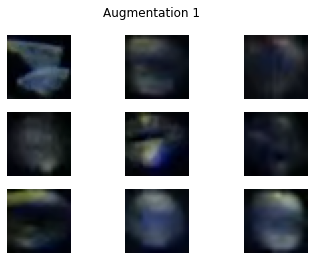

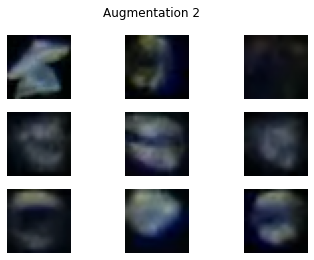

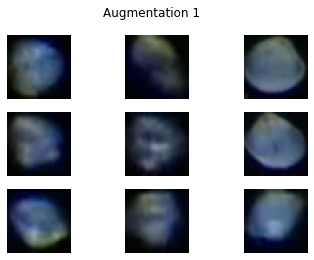

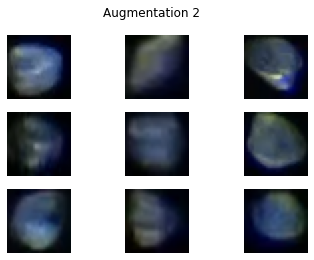

In [4]:

import tensorflow as tf

class BTDatasetCreator:
    def __init__(self, seed: int = 1024):
        self.seed = seed

    def split_pairs(self, ds: list) -> tf.data.Dataset:
        # Split pairs into a1 and a2
        a1 = [pair[0] for pair in ds]
        a2 = [pair[1] for pair in ds]

        return (tf.data.Dataset.from_tensor_slices((a1, a2))
                .shuffle(1000, seed=self.seed)
                .batch(BATCH_SIZE, drop_remainder=True)
                .prefetch(tf.data.AUTOTUNE))

    def __call__(self, ds: list) -> tf.data.Dataset:
        return self.split_pairs(ds)


bt_creator = BTDatasetCreator()
augment_versions = bt_creator(dataset)
sample_augment_versions = iter(augment_versions)


def plot_values(batch: tuple):
    fig, axs = plt.subplots(3, 3)
    fig1, axs1 = plt.subplots(3, 3)

    fig.suptitle("Augmentation 1")
    fig1.suptitle("Augmentation 2")

    a1, a2 = batch

    # plots images on both tables
    for i in range(3):
        for j in range(3):
            # CHANGE(add / 255)
            axs[i][j].imshow(a1[3 * i + j])
            axs[i][j].axis("off")
            axs1[i][j].imshow(a2[3 * i + j])
            axs1[i][j].axis("off")

    plt.show()

for _ in range(2):  # Plot 5 different batches
    batch = next(sample_augment_versions)
    plot_values(batch)

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import load_model
import numpy as np

# Supervised Contrastive Loss
class SupervisedContrastiveLoss(tf.keras.losses.Loss):
    def __init__(self, temperature=0.05, name=None):
        super().__init__(name=name)
        self.temperature = temperature

    def __call__(self, labels, feature_vectors, sample_weight=None):
        feature_vectors_normalized = tf.math.l2_normalize(feature_vectors, axis=1)
        logits = tf.matmul(feature_vectors_normalized, feature_vectors_normalized, transpose_b=True)
        logits /= self.temperature

        labels = tf.expand_dims(labels, 1)
        mask = tf.equal(labels, tf.transpose(labels))
        mask = tf.cast(mask, dtype=tf.float32) - tf.eye(tf.shape(labels)[0])

        logits_exp = tf.exp(logits) * mask
        logits_exp_sum = tf.reduce_sum(logits_exp, axis=1, keepdims=True)
        loss = -tf.reduce_mean(tf.math.log(tf.reduce_sum(logits_exp, axis=1) / logits_exp_sum))

        return loss

# Load the pretrained ResNet backbone and add a new projection head
def load_pretrained_backbone(model_path, projection_size):
    backbone = load_model(model_path)
    last_layer_output = backbone.layers[-1].output

    # Add a new projection head with a unique name
    projection_head = Dense(projection_size, name="projection_head")(last_layer_output)
    model_with_new_projection = models.Model(inputs=backbone.input, outputs=projection_head)
    
    return model_with_new_projection


# Dataset Creator with label parameterization
class SupervisedDatasetCreator:
    def __init__(self, seed=1024):
        self.seed = seed

    def __call__(self, images, labels, batch_size):
        images = tf.convert_to_tensor(images, dtype=tf.float32)
        labels = tf.convert_to_tensor(labels, dtype=tf.int32)

        a1 = images[:, 0]
        a2 = images[:, 1]
        label_pairs = labels

        return (tf.data.Dataset.from_tensor_slices(((a1, a2), label_pairs))
                .shuffle(1000, seed=self.seed)
                .batch(batch_size, drop_remainder=True)
                .prefetch(tf.data.AUTOTUNE))

# Primary Supervised Contrastive Model class with configurable projection size
class PrimaryModel(tf.keras.Model):
    def __init__(self, backbone):
        super().__init__()
        self.model = backbone
        self.loss_tracker = tf.keras.metrics.Mean(name="loss")

    @property
    def metrics(self):
        return [self.loss_tracker]

    def train_step(self, data):
        (y_a, y_b), labels = data
        with tf.GradientTape() as tape:
            z_a, z_b = self.model(y_a, training=True), self.model(y_b, training=True)
            z_concat = tf.concat([z_a, z_b], axis=0)
            labels_concat = tf.concat([labels, labels], axis=0)
            loss = SupervisedContrastiveLoss()(labels_concat, z_concat)

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        self.loss_tracker.update_state(loss)

        return {"loss": self.loss_tracker.result()}

# Function to load and train the model with a single label set and projection head
def train_with_loaded_backbone(model_path, images, labels, projection_size, batch_size, epochs):
    # Load pretrained backbone and add a new projection head
    backbone_with_new_projection = load_pretrained_backbone(model_path, projection_size)
    
    # Create dataset with the given labels
    sup_creator = SupervisedDatasetCreator()
    augment_versions = sup_creator(images, labels, batch_size)

    # Initialize and train the PrimaryModel with the loaded backbone
    primary_model = PrimaryModel(backbone_with_new_projection)
    primary_model.compile(optimizer='Adam')
    primary_model.fit(augment_versions, epochs=epochs)
    
    return primary_model

# Example usage
# Load the pretrained backbone from "C:\Users\shaif\Downloads\sclr.h5"
pretrained_backbone_path = "C:\\Users\\shaif\\Downloads\\sclr.h5"
projection_size = 2048  # or any other size you need
batch_size = 32
epochs = 10

# Initialize dataset creator and generate augmentations with different label sets
sup_creator = SupervisedDatasetCreator()
augment_versions_Y_train = sup_creator(dataset, Y_train, batch_size=batch_size)

# Train the model with Y_train and specified projection size
model = train_with_loaded_backbone(pretrained_backbone_path, dataset, Y_train, projection_size, batch_size, epochs)


Epoch 1/10
3524/3524 [==============================] - 281s 76ms/step - loss: -1.9755e-10
Epoch 2/10
3524/3524 [==============================] - 266s 76ms/step - loss: -2.1549e-10
Epoch 3/10
3524/3524 [==============================] - 268s 76ms/step - loss: -2.0708e-10
Epoch 4/10
3524/3524 [==============================] - 279s 79ms/step - loss: -2.1773e-10
Epoch 5/10
3524/3524 [==============================] - 262s 74ms/step - loss: -2.0731e-10
Epoch 6/10
3524/3524 [==============================] - 270s 77ms/step - loss: -1.8593e-10
Epoch 7/10
3524/3524 [==============================] - 267s 76ms/step - loss: -1.7310e-10
Epoch 8/10
3524/3524 [==============================] - 269s 76ms/step - loss: -2.1299e-10
Epoch 9/10
3524/3524 [==============================] - 265s 75ms/step - loss: 1.3957e-10
Epoch 10/10
2079/3524 [================>.............] - ETA: 1:44 - loss: 6.8852e-10

In [ ]:
model.model.save('mlt_sclr.h5')  # Save the entire SimCLR model

In [12]:

def list_subdirectories(directory_path):
    try:
        subdirectories = [f.path for f in os.scandir(directory_path) if f.is_dir()]
        return subdirectories
    except Exception as e:
        return str(e)

def list_all_subdirectories_with_images(parent_directory):
    subdirectories = list_subdirectories(parent_directory)
    XT = []  # List to store all images
    YT = []  # List to store labels
    YT_count = []
    #print(subdirectories)
    
    label= 0
    length_list = []
    for s in subdirectories:
        #print(s)
        q = 0
        sub = [f.path for f in os.scandir(s) if f.is_dir()]
        #print(sub)
        for f in sub:
            
            print(f)
            q = q +1
            if(q==30):
                break
                
            count = 0
            for img_path in os.listdir(f):
            
                if img_path.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                    img = Image.open(os.path.join(f, img_path))
                    if img.mode != 'RGB':
                        img = img.convert('RGB')
                    img = img.resize((32, 32), Image.ANTIALIAS)
                    img = np.array(img).astype('float32') / 255.0
                    XT.append(img)
                    count = count + 1
                    YT.append(label)
                #print(np.shape(lst))
            length_list.append(count)
            YT_count.append(label)
        label=label+1    
    
    return XT, YT, YT_count, length_list

# Example usage:
directory_path = r'E:\invasive-aquatic-species-data\inv'
images_list, YT, YT_count, lengths_list = list_all_subdirectories_with_images(directory_path)


E:\invasive-aquatic-species-data\inv\invasive\Object_004
E:\invasive-aquatic-species-data\inv\invasive\Object_005
E:\invasive-aquatic-species-data\inv\invasive\Object_009
E:\invasive-aquatic-species-data\inv\invasive\Object_010
E:\invasive-aquatic-species-data\inv\invasive\Object_016
E:\invasive-aquatic-species-data\inv\invasive\Object_019
E:\invasive-aquatic-species-data\inv\invasive\Object_023
E:\invasive-aquatic-species-data\inv\invasive\Object_033
E:\invasive-aquatic-species-data\inv\invasive\Object_052
E:\invasive-aquatic-species-data\inv\invasive\Object_065
E:\invasive-aquatic-species-data\inv\invasive\Object_076
E:\invasive-aquatic-species-data\inv\invasive\Object_084
E:\invasive-aquatic-species-data\inv\invasive\Object_086
E:\invasive-aquatic-species-data\inv\invasive\Object_1002
E:\invasive-aquatic-species-data\inv\invasive\Object_1004
E:\invasive-aquatic-species-data\inv\invasive\Object_1006
E:\invasive-aquatic-species-data\inv\invasive\Object_1009
E:\invasive-aquatic-species

C:\Users\shaif\AppData\Local\Temp\ipykernel_11944\556640443.py:36: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((32, 32), Image.ANTIALIAS)


E:\invasive-aquatic-species-data\inv\invasive\Object_1010
E:\invasive-aquatic-species-data\inv\invasive\Object_1014
E:\invasive-aquatic-species-data\inv\invasive\Object_1015
E:\invasive-aquatic-species-data\inv\invasive\Object_1027
E:\invasive-aquatic-species-data\inv\invasive\Object_1044
E:\invasive-aquatic-species-data\inv\invasive\Object_1049
E:\invasive-aquatic-species-data\inv\invasive\Object_1052
E:\invasive-aquatic-species-data\inv\invasive\Object_1080
E:\invasive-aquatic-species-data\inv\invasive\Object_1082
E:\invasive-aquatic-species-data\inv\invasive\Object_1091
E:\invasive-aquatic-species-data\inv\invasive\Object_1096
E:\invasive-aquatic-species-data\inv\invasive\Object_1105
E:\invasive-aquatic-species-data\inv\noninvasive\Object_003
E:\invasive-aquatic-species-data\inv\noninvasive\Object_006
E:\invasive-aquatic-species-data\inv\noninvasive\Object_007
E:\invasive-aquatic-species-data\inv\noninvasive\Object_008
E:\invasive-aquatic-species-data\inv\noninvasive\Object_011
E:\i

In [13]:

import random
combined_data = list(zip(images_list, YT))
random.shuffle(combined_data)
images_list, YT = zip(*combined_data)

yt = to_categorical(YT)
ytc = to_categorical(YT_count)

k = int(.7 * len(lengths_list))

num_test_samples = np.sum(lengths_list[k:])
X_test = images_list[:num_test_samples]
Y_test = yt[:num_test_samples]
X_train = images_list[num_test_samples:]
Y_train = yt[num_test_samples:]


In [14]:

from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D
model = sup_contrastive_model.model
model.layers[0].trainable = False
x = model.layers[-1].output 
output = Dense(2, activation='softmax')(x)

new_model = keras.models.Model(inputs=model.input, outputs=output)
new_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
new_model.fit(np.array(X_train).astype('float32'),Y_train, batch_size=32, epochs=4, validation_split = .2)

Epoch 1/4
24/24 [==============================] - 9s 144ms/step - loss: 9.5127 - accuracy: 0.7638 - val_loss: 72347.7734 - val_accuracy: 0.4759
Epoch 2/4
24/24 [==============================] - 1s 51ms/step - loss: 3.3986 - accuracy: 0.7154 - val_loss: 120464.5781 - val_accuracy: 0.4759
Epoch 3/4
24/24 [==============================] - 2s 67ms/step - loss: 0.4211 - accuracy: 0.8765 - val_loss: 223703.2969 - val_accuracy: 0.4759
Epoch 4/4
24/24 [==============================] - 1s 60ms/step - loss: 0.1872 - accuracy: 0.9289 - val_loss: 16125.7422 - val_accuracy: 0.4759


In [33]:
from sklearn.metrics import accuracy_score
predictions = new_model.predict(np.array(X_test).astype('float32'))
accuracy = accuracy_score(np.argmax(Y_test,axis = 1),np.argmax(predictions,axis = 1))
print("Test Accuracy:", accuracy)
from sklearn.metrics import accuracy_score, balanced_accuracy_score
ground_truth_labels = np.argmax(Y_test, axis=1)
predicted_labels = np.argmax(predictions, axis=1)
balanced_accuracy = balanced_accuracy_score(ground_truth_labels, predicted_labels)
print("Balanced Accuracy:", balanced_accuracy)


Test Accuracy: 0.5572916666666666
Balanced Accuracy: 0.5
